In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from feature_engine.transformation import ArcsinTransformer

In [2]:
breast_cancer = load_breast_cancer()

In [3]:
X=pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)

In [4]:
y=breast_cancer.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
vars_ = [
  'mean compactness',
  'mean concavity',
  'mean concave points',
  'mean fractal dimension',
  'smoothness error',
  'compactness error',
  'concavity error',
  'concave points error',
  'symmetry error',
  'fractal dimension error',
  'worst symmetry',
  'worst fractal dimension']

In [8]:
# set up the arcsin transformer
tf = ArcsinTransformer(variables = vars_)

# fit the transformer
tf.fit(X_train)

ArcsinTransformer(variables=['mean compactness', 'mean concavity',
                             'mean concave points', 'mean fractal dimension',
                             'smoothness error', 'compactness error',
                             'concavity error', 'concave points error',
                             'symmetry error', 'fractal dimension error',
                             'worst symmetry', 'worst fractal dimension'])

In [10]:
# transform the data
train_t = tf.transform(X_train)
test_t = tf.transform(X_test)

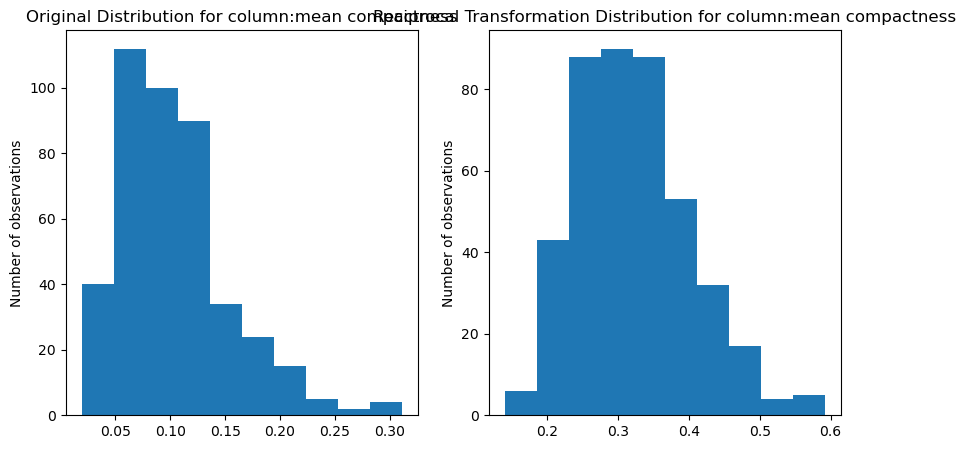

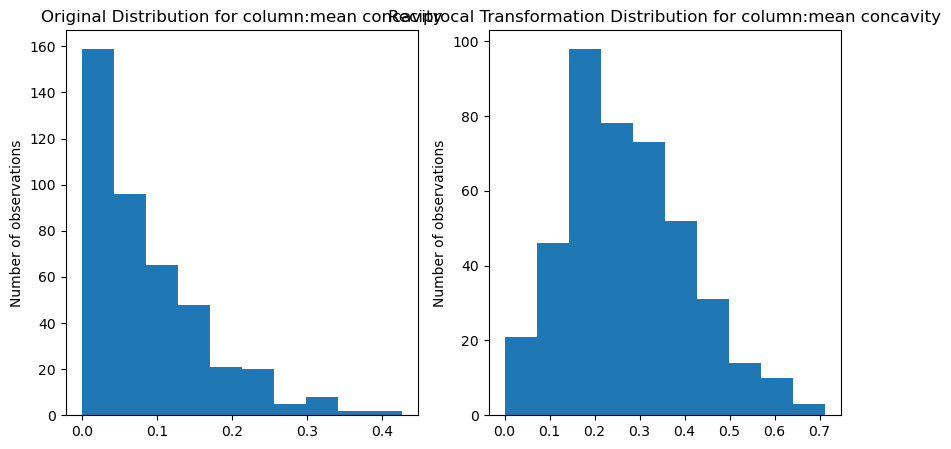

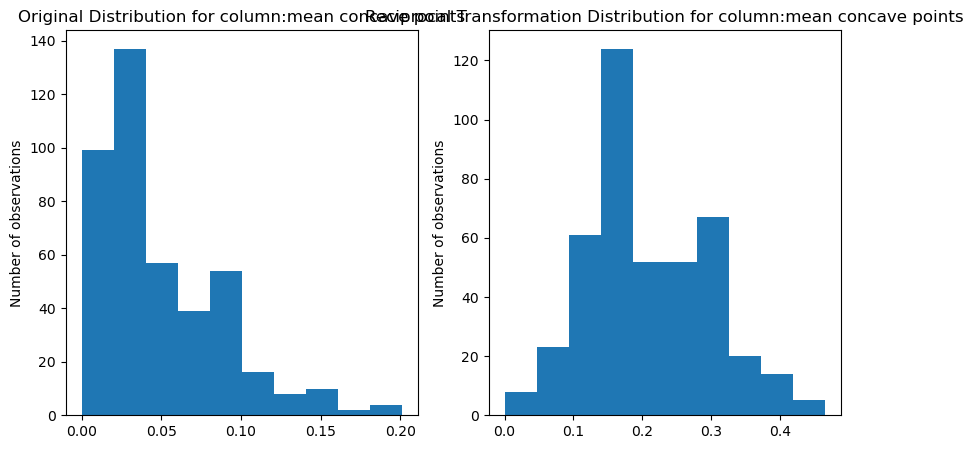

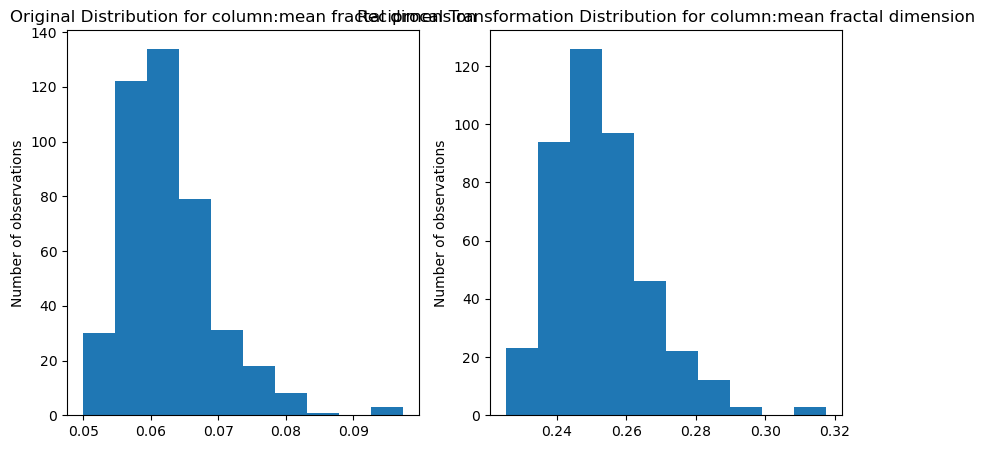

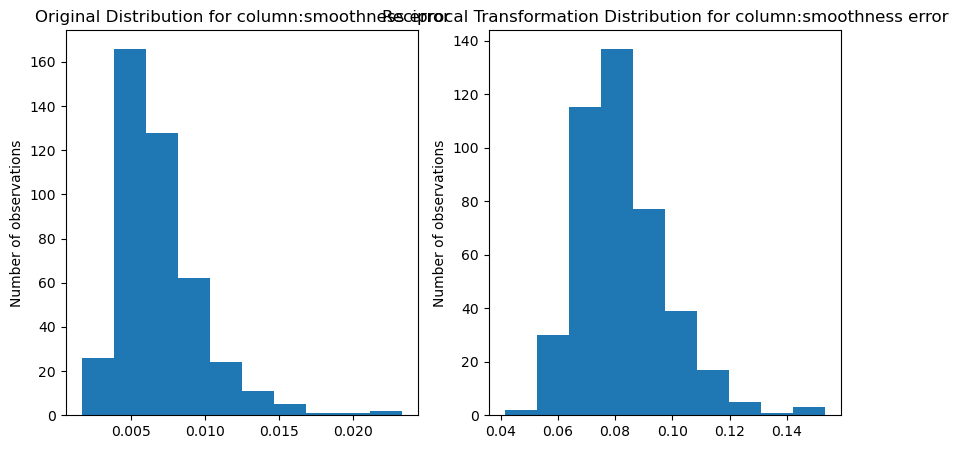

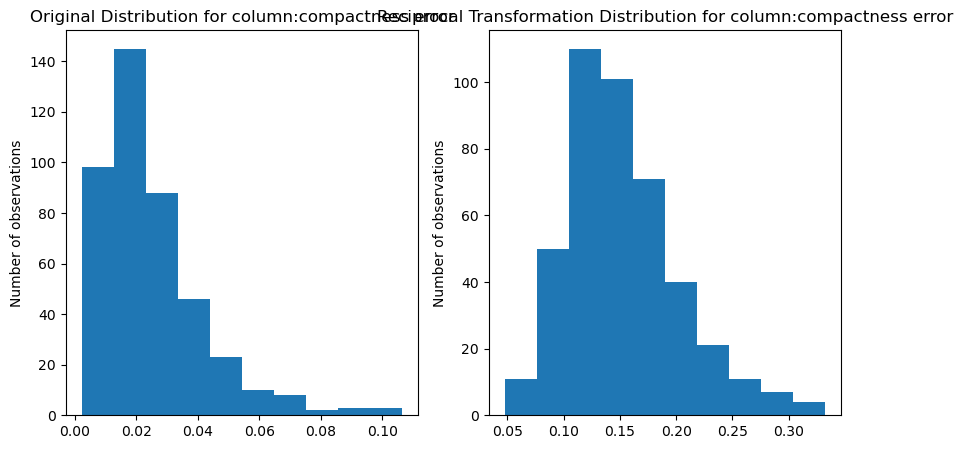

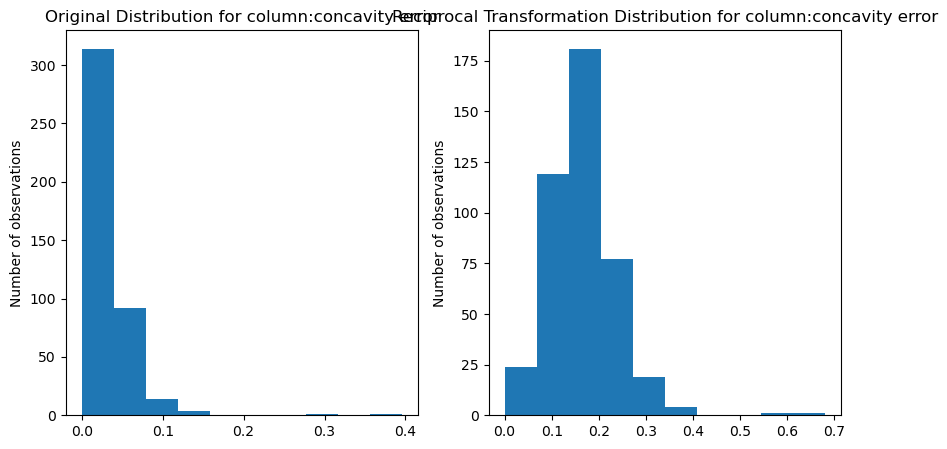

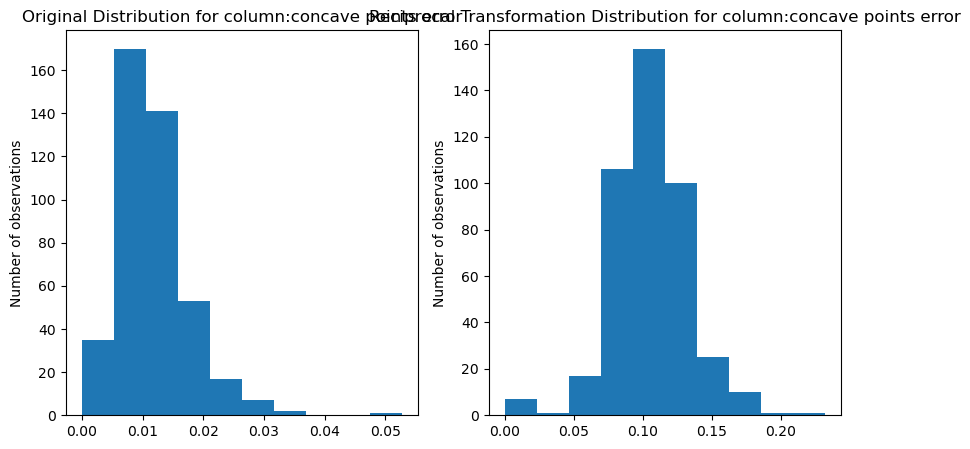

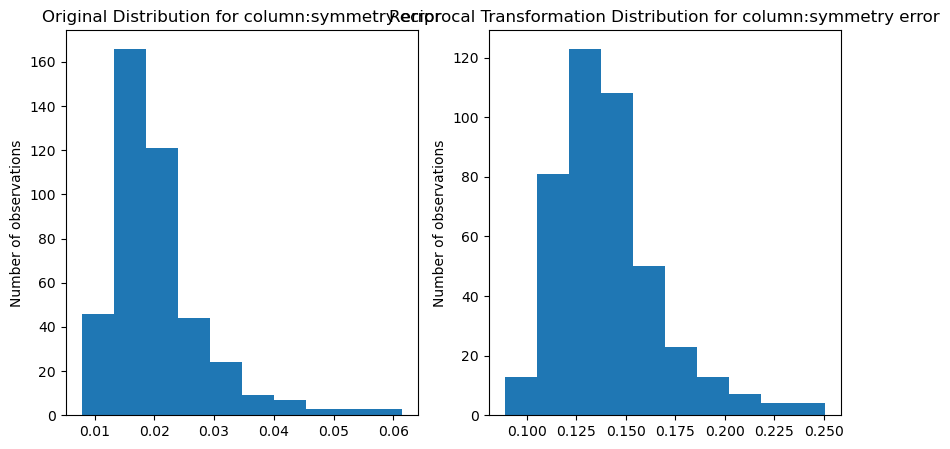

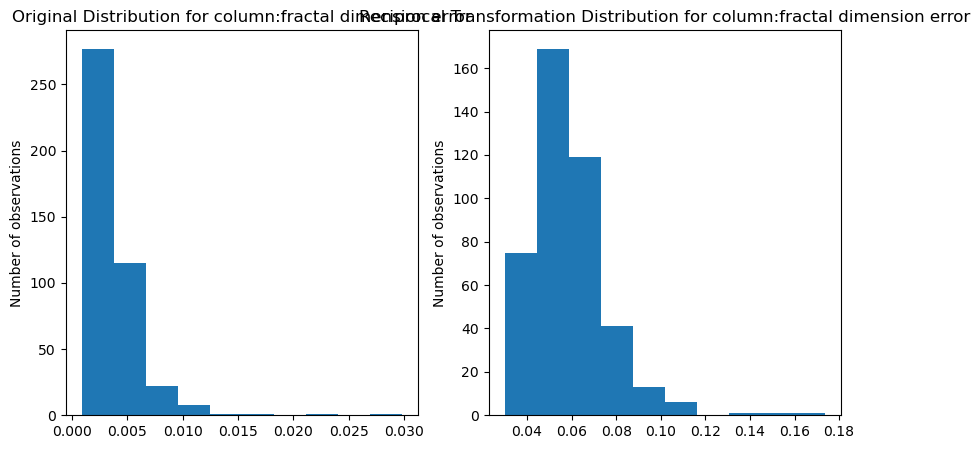

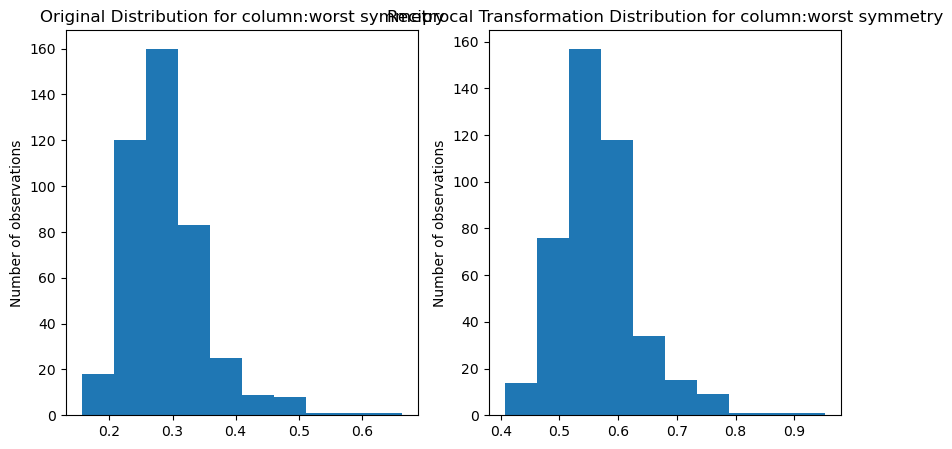

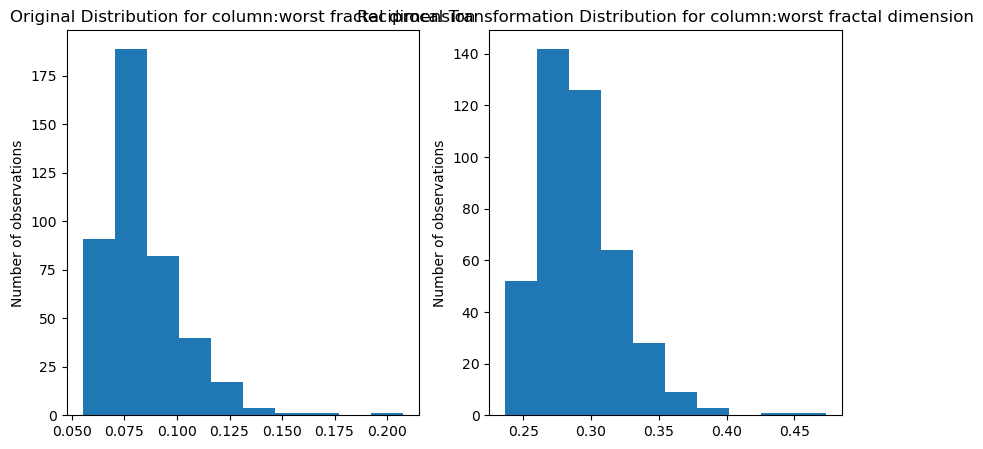

In [15]:
for var in vars_:
    fig, ax= plt.subplots(1,2)
    X_train[var].plot.hist(ax=ax[0],figsize=(10,5))
    ax[0].set_title('Original Distribution for column:'+var)
    ax[0].set_ylabel('Number of observations')

    train_t[var].plot.hist(ax=ax[1])
    ax[1].set_title('Reciprocal Transformation Distribution for column:'+var)
    ax[1].set_ylabel('Number of observations')    
    plt.show()